# Activity 1.2 : Training Neural Networks


**Name:** Marie Emmanuelle T. Tacsay
<br> **Section:** CPE32S8

#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [3]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [4]:

filepath = "/content/drive/MyDrive/Hands-On Activity 2.2_CPE313/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [5]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
419,3,129,64,29,115,26.4,0.219,28,1
253,0,86,68,32,0,35.8,0.238,25,0
508,2,84,50,23,76,30.4,0.968,21,0
265,5,96,74,18,67,33.6,0.997,43,0
534,1,77,56,30,56,33.3,1.251,24,0


In [6]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [29]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [31]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [32]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [33]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [35]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 13ms/step - loss: 0.7033 - accuracy: 0.5590 - val_loss: 0.6984 - val_accuracy: 0.6094
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.5851 - val_loss: 0.6822 - val_accuracy: 0.6458
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6692 - accuracy: 0.6076 - val_loss: 0.6679 - val_accuracy: 0.6562
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.6389 - val_loss: 0.6550 - val_accuracy: 0.6406
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.6528 - val_loss: 0.6434 - val_accuracy: 0.6458
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6304 - accuracy: 0.6649 - val_loss: 0.6328 - val_accuracy: 0.6406
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6197 - accuracy: 0.6667 - val_loss: 0.6231 - val_accuracy: 0.6458
Epoch 8/200


In [36]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [37]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [38]:
y_pred_prob_nn_1[:10]

array([[0.44611877],
       [0.72555375],
       [0.30970973],
       [0.18479007],
       [0.20088911],
       [0.52571154],
       [0.02553903],
       [0.4378395 ],
       [0.9032677 ],
       [0.12709895]], dtype=float32)

Create the plot_roc function

In [39]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.750
roc-auc is 0.814


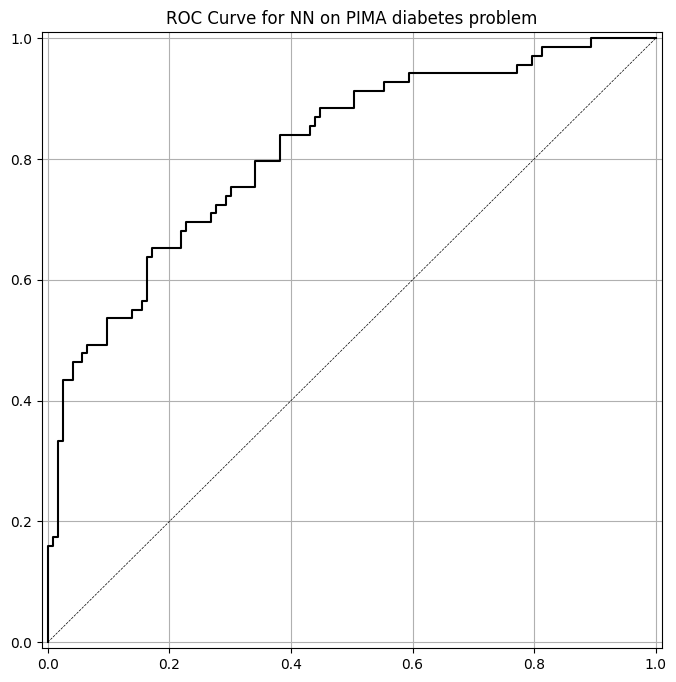

In [40]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [41]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

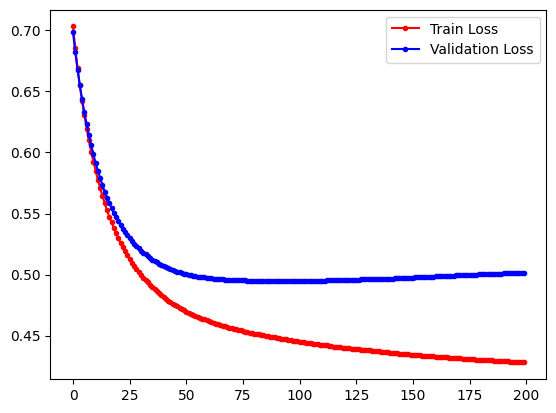

In [42]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?
<br> **Answer:** The graph above shows that the model doesn't process and trained the data efficiently since the train and validation loss, based on the graph is not that good. Also the accuracy and roc-auc score of the model reached for approximately about 80% which shows a poor performace regarding training data and predicting its values. From all the data that were processed, the model only reached for about 77% in terms of accuracy as well as 81.5% when it comes to roc-auc score. With these results, it is evident that the model doesn't show a great performance when it comes to processing and training the data.


## Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [43]:
x = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=11111)

In [45]:
normalizer = StandardScaler()
x_train_n = normalizer.fit_transform(x_train)
x_test_n = normalizer.transform(x_test)

In [46]:
#model 1

model = Sequential([
      Dense(6, input_shape=(8,), activation="relu"),
      Dense(6, activation = 'relu'),
      Dense(1, activation="sigmoid")
  ])

model.compile(SGD(learning_rate = 0.003),
              "binary_crossentropy", metrics = ['accuracy'])

model_fit = model.fit(x_train_n, y_train, validation_data = (x_test_n, y_test),
                      epochs = 1500)


Epoch 1/1500
18/18 [==============================] - 1s 14ms/step - loss: 0.7701 - accuracy: 0.6337 - val_loss: 0.7796 - val_accuracy: 0.5885
Epoch 2/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7651 - accuracy: 0.6372 - val_loss: 0.7749 - val_accuracy: 0.5885
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7604 - accuracy: 0.6372 - val_loss: 0.7705 - val_accuracy: 0.5833
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7559 - accuracy: 0.6424 - val_loss: 0.7663 - val_accuracy: 0.5833
Epoch 5/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.7517 - accuracy: 0.6458 - val_loss: 0.7624 - val_accuracy: 0.5781
Epoch 6/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.7477 - accuracy: 0.6441 - val_loss: 0.7587 - val_accuracy: 0.5833
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7440 - accuracy: 0.6458 - val_loss: 0.7552 - val_accuracy: 0.5885
Epoch

In [47]:
y_pred_class = (model.predict(x_test_n) > 0.5).astype('int32')
y_pred_prob = model.predict(x_test_n)

6/6 [==============================] - 0s 2ms/step


In [48]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.781
roc-auc is 0.832


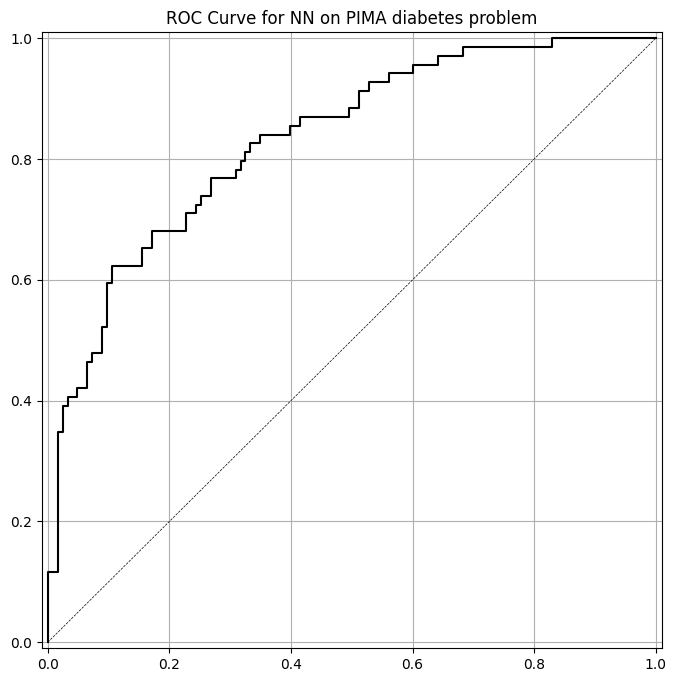

In [49]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred_prob, 'NN')

In [50]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
accuracies = accuracy_score(y_test,y_pred_class)
accuracies

0.78125

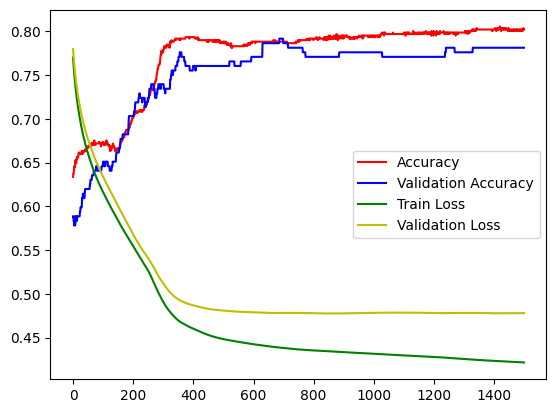

In [52]:
fig, ax = plt.subplots()
ax.plot(model_fit.history["accuracy"],'r', label="Accuracy")
ax.plot(model_fit.history["val_accuracy"],'b',
        label="Validation Accuracy")
ax.plot(model_fit.history["loss"],'g', label="Train Loss")
ax.plot(model_fit.history["val_loss"],'y', label="Validation Loss")
ax.legend()

**Analysis:** The graph above shows that the model gives an average performance when it comes to processing and training the data efficiently since the train and validation loss, based on the graph is not that good. The graph doen't show a curve line o graph which is a good indication that the values were being processed and the model is learning well. Also, the graph in the validation accuracy and accuracy has its inconsistent line giving it a rough visualization copared to the other one. Given that the model meets the requirements of the needed number of hidden layers as well as the number epochs and learning rate, it still gives low results. Also the accuracy and roc-auc score of the model reached for approximately about 80% which shows a poor performace regarding training data and predicting its values. From all the data that were processed, the model only reached for about 78.1% in terms of accuracy as well as 83.2% when it comes to roc-auc score.

In [53]:
#model 2

model = Sequential([
      Dense(12, input_shape=(8,), activation="relu"),
      Dense(8, activation = 'relu'),
      Dense(12, activation = 'relu'),
      Dense(8, activation = 'softmax'),
      Dense(8, activation = 'tanh'),
      Dense(1, activation="sigmoid")
  ])

model.compile(SGD(learning_rate = 0.01),
              "binary_crossentropy", metrics = ['accuracy'])

model_fit = model.fit(x_train_n, y_train, validation_data = (x_test_n, y_test),
                      epochs = 500)


Epoch 1/500
18/18 [==============================] - 1s 15ms/step - loss: 0.6723 - accuracy: 0.6545 - val_loss: 0.6708 - val_accuracy: 0.6406
Epoch 2/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.6545 - val_loss: 0.6649 - val_accuracy: 0.6406
Epoch 3/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6584 - accuracy: 0.6545 - val_loss: 0.6610 - val_accuracy: 0.6406
Epoch 4/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.6545 - val_loss: 0.6581 - val_accuracy: 0.6406
Epoch 5/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6545 - val_loss: 0.6562 - val_accuracy: 0.6406
Epoch 6/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6492 - accuracy: 0.6545 - val_loss: 0.6549 - val_accuracy: 0.6406
Epoch 7/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6475 - accuracy: 0.6545 - val_loss: 0.6540 - val_accuracy: 0.6406
Epoch 8/500


In [54]:
y_pred_class = (model.predict(x_test_n) > 0.5).astype('int32')
y_pred_prob = model.predict(x_test_n)

6/6 [==============================] - 0s 2ms/step


In [55]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.771
roc-auc is 0.791


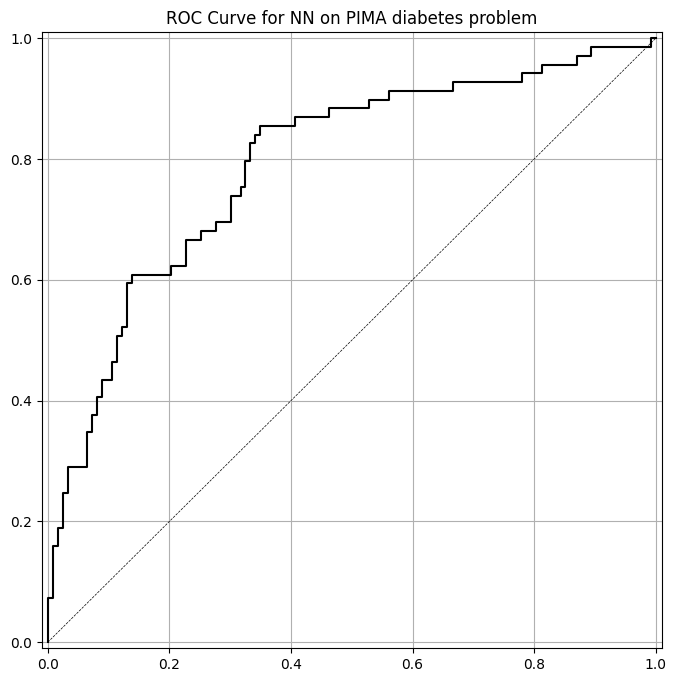

In [56]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred_prob, 'NN')

In [57]:
accuracies = accuracy_score(y_test,y_pred_class)
accuracies

0.7708333333333334

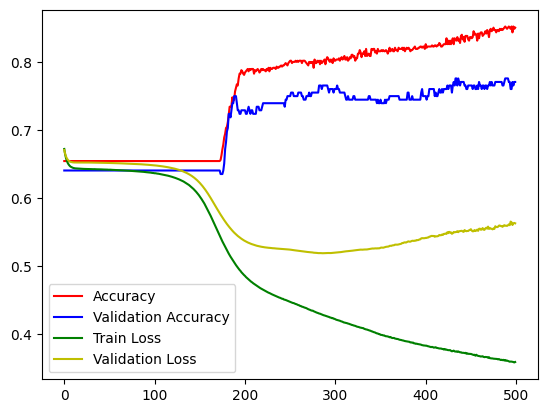

In [58]:
fig, ax = plt.subplots()
ax.plot(model_fit.history["accuracy"],'r', label="Accuracy")
ax.plot(model_fit.history["val_accuracy"],'b',
        label="Validation Accuracy")
ax.plot(model_fit.history["loss"],'g', label="Train Loss")
ax.plot(model_fit.history["val_loss"],'y', label="Validation Loss")
ax.legend()

**Analysis:** Based on the graph above, the model gives a low perfromance when it comes to processing and training the data. The accuracy and validation accuracy shows a stagnant form (straight line) in the first 200 epochs. This shows that the model processed an generate the same accuracy level which is not a good indication of the perdomance of the model. In addition, just like the previous model, the accuracy and validation accuracy graph seems to have rough curve which shows an inconsistent output values processed and generated by the model. The model created have multiple hidden layers with various parameters which will process the data. Also the number of epochs and learning rate was changed to observe changes and how to enhnace the model performance. The accuracy and roc-auc score of the model reached for approximately about 80% which shows an average performace regarding training data and predicting its values. From all the data that were processed, the model only reached for about 77.1% in terms of accuracy as well as 79.1% when it comes to roc-auc score.

In [101]:
#model 3

model = Sequential([
      Dense(12, input_shape=(8,), activation="relu"),
      Dense(8, activation = 'relu'),
      Dense(12, activation = 'relu'),
      Dense(8, activation = 'softmax'),
      Dense(8, activation = 'tanh'),
      Dense(1, activation="sigmoid")
  ])

model.compile(SGD(learning_rate = 0.01),
              "binary_crossentropy", metrics = ['accuracy'])

model_fit = model.fit(x_train_n, y_train, validation_data = (x_test_n, y_test),
                      epochs = 300, batch_size = 10)


Epoch 1/300
58/58 [==============================] - 1s 7ms/step - loss: 0.6968 - accuracy: 0.4740 - val_loss: 0.6845 - val_accuracy: 0.6406
Epoch 2/300
58/58 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.6545 - val_loss: 0.6703 - val_accuracy: 0.6406
Epoch 3/300
58/58 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.6545 - val_loss: 0.6622 - val_accuracy: 0.6406
Epoch 4/300
58/58 [==============================] - 0s 4ms/step - loss: 0.6562 - accuracy: 0.6545 - val_loss: 0.6572 - val_accuracy: 0.6406
Epoch 5/300
58/58 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6545 - val_loss: 0.6543 - val_accuracy: 0.6406
Epoch 6/300
58/58 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6545 - val_loss: 0.6526 - val_accuracy: 0.6406
Epoch 7/300
58/58 [==============================] - 0s 3ms/step - loss: 0.6463 - accuracy: 0.6545 - val_loss: 0.6516 - val_accuracy: 0.6406
Epoch 8/300
5

In [102]:
y_pred_class = (model.predict(x_test_n) > 0.5).astype('int32')
y_pred_prob = model.predict(x_test_n)

6/6 [==============================] - 0s 2ms/step


In [103]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.786
roc-auc is 0.794


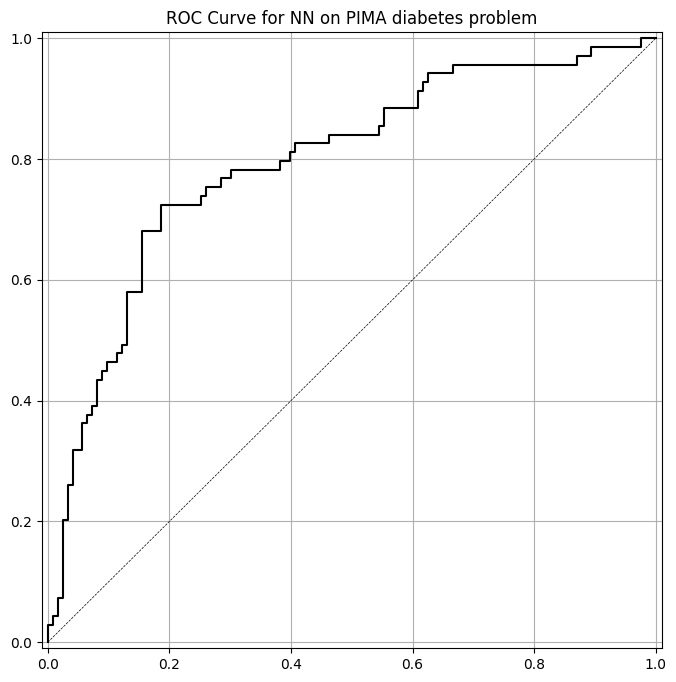

In [104]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred_prob, 'NN')

In [105]:
accuracies = accuracy_score(y_test,y_pred_class)
accuracies

0.7864583333333334

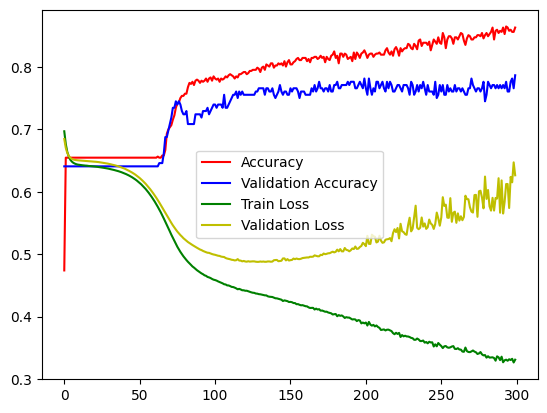

In [106]:
fig, ax = plt.subplots()
ax.plot(model_fit.history["accuracy"],'r', label="Accuracy")
ax.plot(model_fit.history["val_accuracy"],'b',
        label="Validation Accuracy")
ax.plot(model_fit.history["loss"],'g', label="Train Loss")
ax.plot(model_fit.history["val_loss"],'y', label="Validation Loss")
ax.legend()

**Analysis:** Based on the graph above, the model gives a low performance when it comes to processing and training the data. The graph of the accuracy and validation accuracy shows an inconsistent values which gives the impression of the model of not perfroming or processing the model properly. Based on the graph, the first 50 epochs shows a stagnant form of the graph. It could be mean that the model gernerate the same accuracy level that may lead to the impression that the model process and trains values poorly leading to a low or same accuracy rate of the model. In addition, the train and validation loss of this model shows a smooth curve in the model's first 130 epochs but when the model goes further, the graph became rough. Inconsistent values shows that the model is not performing well on the dataset or it could be that the dataset has its inconsistent data which makes it difficult for the model to process. The model created have multiple hidden layers with various parameters which will process the data. Also the number of epochs and learning rate was changed to observe changes and how to enhnace the model performance. The accuracy and roc-auc score of the model reached for approximately about 80% which shows an average performace regarding training data and predicting its values. From all the data that were processed, the model only reached for about 78.6% in terms of accuracy as well as 79.4% when it comes to roc-auc score

### **Using Other Dataset**

In [108]:
filepath = "/content/drive/MyDrive/HOA 4.2_CPE312/Raisin_Dataset.csv"
raisin_df = pd.read_csv(filepath)

In [109]:
raisin_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [110]:
raisin_df['Class'] = raisin_df['Class'].map({'Besni': 1, 'Kecimen': 0})

In [111]:
print(raisin_df.shape)
raisin_df.sample(5)

(900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
352,46601,277.353280,216.272051,0.626065,48457,0.761653,820.106,0
709,108379,482.565578,289.385727,0.800239,111707,0.702710,1316.871,1
836,181126,949.662672,293.386698,0.951082,225592,0.414154,2352.029,1
711,204226,648.204288,402.283271,0.784118,207198,0.773988,1724.662,1
432,60199,375.279688,205.414052,0.836896,61711,0.736289,971.185,0


In [112]:
raisin_df.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class                int64
dtype: object

In [113]:
raisin_df.shape

(900, 8)

In [114]:
new_x = raisin_df.iloc[:, :-1].values
new_y = raisin_df["Class"].values

In [115]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.25, random_state=11111)

In [116]:
np.mean(new_y), np.mean(1-new_y)

(0.5, 0.5)

In [117]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(x_train)
X_test_norm = normalizer.transform(x_test)

In [118]:
model  = Sequential([
    Dense(12, input_shape=(7,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [119]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
22/22 [==============================] - 1s 16ms/step - loss: 0.9185 - accuracy: 0.3378 - val_loss: 0.7858 - val_accuracy: 0.4133
Epoch 2/200
22/22 [==============================] - 0s 8ms/step - loss: 0.7813 - accuracy: 0.4178 - val_loss: 0.6794 - val_accuracy: 0.4978
Epoch 3/200
22/22 [==============================] - 0s 8ms/step - loss: 0.6910 - accuracy: 0.5852 - val_loss: 0.6065 - val_accuracy: 0.7378
Epoch 4/200
22/22 [==============================] - 0s 9ms/step - loss: 0.6274 - accuracy: 0.7185 - val_loss: 0.5535 - val_accuracy: 0.8178
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5785 - accuracy: 0.7793 - val_loss: 0.5151 - val_accuracy: 0.8578
Epoch 6/200
22/22 [==============================] - 0s 8ms/step - loss: 0.5425 - accuracy: 0.8104 - val_loss: 0.4858 - val_accuracy: 0.8578
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5140 - accuracy: 0.8222 - val_loss: 0.4639 - val_accuracy: 0.8667
Epoch 8/200


In [120]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_1 = model.predict(X_test_norm)

8/8 [==============================] - 0s 2ms/step


In [121]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Raisin Classification'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.880
roc-auc is 0.924


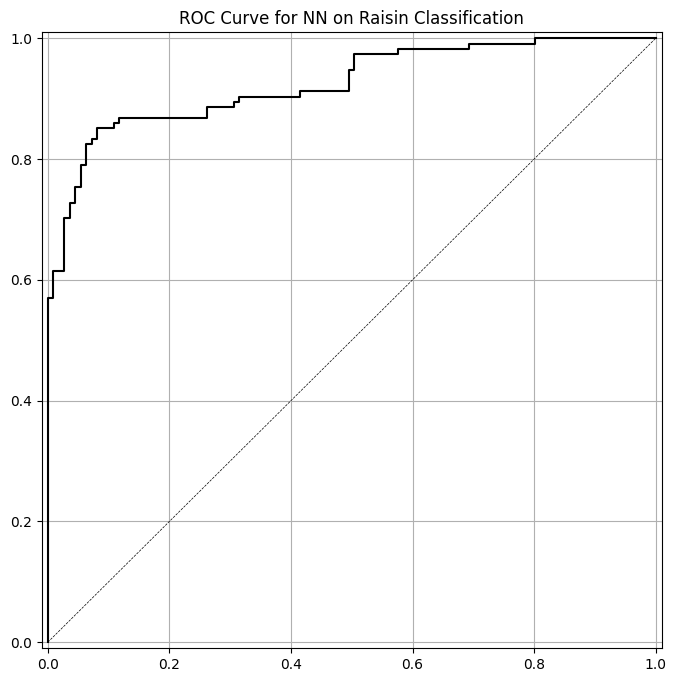

In [122]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [123]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

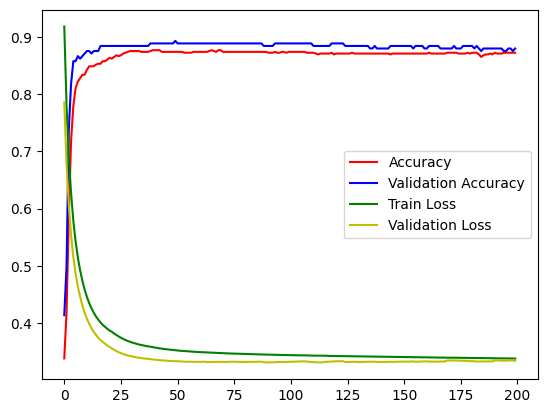

In [124]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["accuracy"],'r', label="Accuracy")
ax.plot(run_hist_1.history["val_accuracy"],'b',
        label="Validation Accuracy")
ax.plot(run_hist_1.history["loss"],'g', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'y', label="Validation Loss")
ax.legend()

## **Models**

In [125]:
#model 1

model = Sequential([
      Dense(6, input_shape=(7,), activation="relu"),
      Dense(6, activation = 'relu'),
      Dense(1, activation="sigmoid")
  ])

model.compile(SGD(learning_rate = 0.003),
              "binary_crossentropy", metrics = ['accuracy'])

model_fit = model.fit(X_train_norm, y_train, validation_data = (X_test_norm, y_test),
                      epochs = 1500, batch_size = 10)


Epoch 1/1500
68/68 [==============================] - 1s 5ms/step - loss: 0.7357 - accuracy: 0.5141 - val_loss: 0.7190 - val_accuracy: 0.5467
Epoch 2/1500
68/68 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.5733 - val_loss: 0.6827 - val_accuracy: 0.6000
Epoch 3/1500
68/68 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.6000 - val_loss: 0.6567 - val_accuracy: 0.6400
Epoch 4/1500
68/68 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.6370 - val_loss: 0.6366 - val_accuracy: 0.6622
Epoch 5/1500
68/68 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6578 - val_loss: 0.6197 - val_accuracy: 0.6889
Epoch 6/1500
68/68 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.6726 - val_loss: 0.6053 - val_accuracy: 0.6978
Epoch 7/1500
68/68 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.6830 - val_loss: 0.5924 - val_accuracy: 0.7111
Epoch 

In [126]:
y_pred_class = (model.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob = model.predict(X_test_norm)

8/8 [==============================] - 0s 3ms/step


In [127]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Raisin Classification'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.884
roc-auc is 0.932


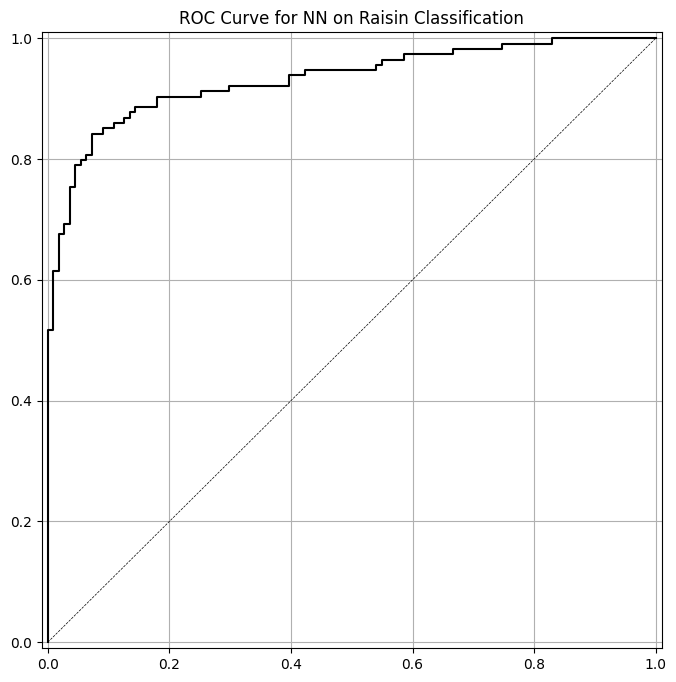

In [128]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred_prob, 'NN')

In [129]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [130]:
accuracies = accuracy_score(y_test,y_pred_class)
accuracies

0.8844444444444445

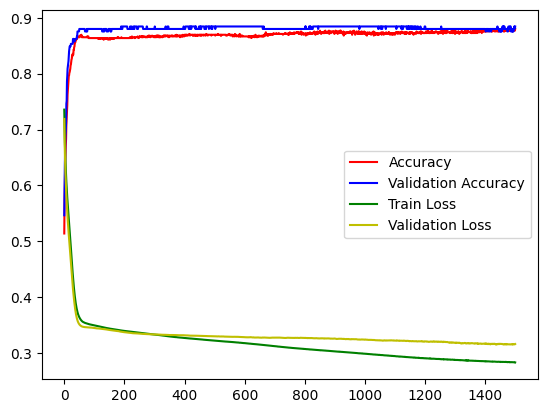

In [131]:
fig, ax = plt.subplots()
ax.plot(model_fit.history["accuracy"],'r', label="Accuracy")
ax.plot(model_fit.history["val_accuracy"],'b',
        label="Validation Accuracy")
ax.plot(model_fit.history["loss"],'g', label="Train Loss")
ax.plot(model_fit.history["val_loss"],'y', label="Validation Loss")
ax.legend()

**Analysis:** The graph above shows that the model gives a good performance when it comes to processing and training the data efficiently since the train and validation loss, based on the graph is good. Both the graphs show a curve-like line which gives the impression for the model that it process and predicts values in the given dataset. However, the curve is not that smooth since it has spikes o it creates a rough visualization of the graph, making the model produceaccuracy and data loss seems inconsistent. Given that the model meets the requirements of the needed number of hidden layers as well as the number epochs and learning rate, it gives a good result compared when using the previous dataset. Also the accuracy and roc-auc score of the model reached for approximately about 92% which shows a promising performace regarding training data and predicting its values. From all the data that were processed, the model reached for about 88.4% in terms of accuracy as well as 93.2% when it comes to roc-auc score. Furthermore, the dataset that was used in this part is cleaned and concise compared to the previous dataset which gives the reason why the model performes better compared to the previous one.

In [150]:
#model 2

model = Sequential([
      Dense(12, input_shape=(7,), activation="relu"),
      Dense(8, activation = 'relu'),
      Dense(12, activation = 'relu'),
      Dense(8, activation = 'softmax'),
      Dense(8, activation = 'tanh'),
      Dense(1, activation="sigmoid")
  ])

model.compile(SGD(learning_rate = 0.01),
              "binary_crossentropy", metrics = ['accuracy'])

model_fit = model.fit(X_train_norm, y_train, validation_data = (X_test_norm, y_test),
                      epochs = 500, batch_size = 10)


Epoch 1/500
68/68 [==============================] - 1s 6ms/step - loss: 0.6945 - accuracy: 0.4326 - val_loss: 0.6944 - val_accuracy: 0.5200
Epoch 2/500
68/68 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4741 - val_loss: 0.6938 - val_accuracy: 0.5067
Epoch 3/500
68/68 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.4978 - val_loss: 0.6930 - val_accuracy: 0.5289
Epoch 4/500
68/68 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5274 - val_loss: 0.6924 - val_accuracy: 0.5511
Epoch 5/500
68/68 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5526 - val_loss: 0.6917 - val_accuracy: 0.5467
Epoch 6/500
68/68 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5304 - val_loss: 0.6909 - val_accuracy: 0.5644
Epoch 7/500
68/68 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5496 - val_loss: 0.6901 - val_accuracy: 0.5733
Epoch 8/500
6

In [151]:
y_pred_class = (model.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob = model.predict(X_test_norm)

8/8 [==============================] - 0s 3ms/step


In [152]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Raisin Classification'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.889
roc-auc is 0.932


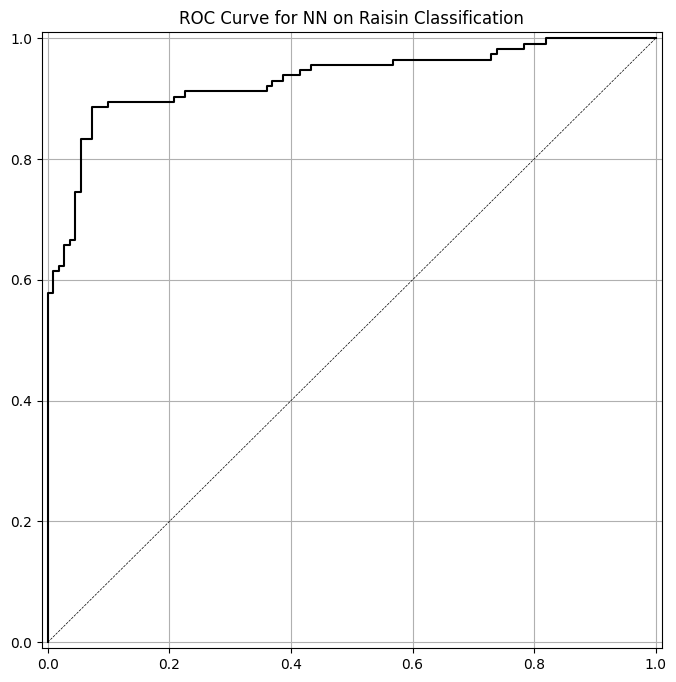

In [153]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred_prob, 'NN')

In [154]:
accuracies = accuracy_score(y_test,y_pred_class)
accuracies

0.8888888888888888

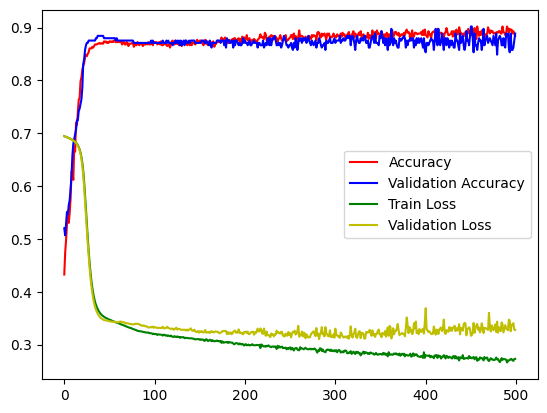

In [155]:
fig, ax = plt.subplots()
ax.plot(model_fit.history["accuracy"],'r', label="Accuracy")
ax.plot(model_fit.history["val_accuracy"],'b',
        label="Validation Accuracy")
ax.plot(model_fit.history["loss"],'g', label="Train Loss")
ax.plot(model_fit.history["val_loss"],'y', label="Validation Loss")
ax.legend()

**Analysis:** Based on the graph above, the model gives an average perfromance when it comes to processing and training the data. The model created have multiple hidden layers with various parameters which will process the data. Also the number of epochs and learning rate was changed to observe changes and how to enhnace the model performance. Based on the graph, both the accuracy and validation accuracy has its rough visualization on their curve which shows an insconsistent output when it comes to the model's accuracy. This would reflect on the model's perfromance when it comes to processing and predicting values. Also, the train and validation loss has also rough visualization on their curves which shows an inconsistent values being generated by the model. The accuracy and roc-auc score of the model reached for approximately about 90% which shows a good performace regarding training data and predicting its values. From all the data that were processed, the model only reached for about 88.9% in terms of accuracy as well as 93.2% when it comes to roc-auc score.

In [138]:
#model 3

model = Sequential([
      Dense(12, input_shape=(7,), activation="relu"),
      Dense(8, activation = 'relu'),
      Dense(12, activation = 'relu'),
      Dense(8, activation = 'softmax'),
      Dense(8, activation = 'tanh'),
      Dense(1, activation="sigmoid")
  ])

model.compile(SGD(learning_rate = 0.01),
              "binary_crossentropy", metrics = ['accuracy'])

model_fit = model.fit(X_train_norm, y_train, validation_data = (X_test_norm, y_test),
                      epochs = 300, batch_size = 10)


Epoch 1/300
68/68 [==============================] - 1s 9ms/step - loss: 0.6942 - accuracy: 0.4978 - val_loss: 0.6923 - val_accuracy: 0.5067
Epoch 2/300
68/68 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.4978 - val_loss: 0.6911 - val_accuracy: 0.5067
Epoch 3/300
68/68 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.5096 - val_loss: 0.6906 - val_accuracy: 0.5200
Epoch 4/300
68/68 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5230 - val_loss: 0.6900 - val_accuracy: 0.6089
Epoch 5/300
68/68 [==============================] - 0s 5ms/step - loss: 0.6894 - accuracy: 0.6400 - val_loss: 0.6892 - val_accuracy: 0.6533
Epoch 6/300
68/68 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.6459 - val_loss: 0.6883 - val_accuracy: 0.6267
Epoch 7/300
68/68 [==============================] - 0s 6ms/step - loss: 0.6876 - accuracy: 0.7052 - val_loss: 0.6872 - val_accuracy: 0.6267
Epoch 8/300
6

In [139]:
y_pred_class = (model.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob = model.predict(X_test_norm)

8/8 [==============================] - 0s 2ms/step


In [140]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Raisin Classification'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.889
roc-auc is 0.926


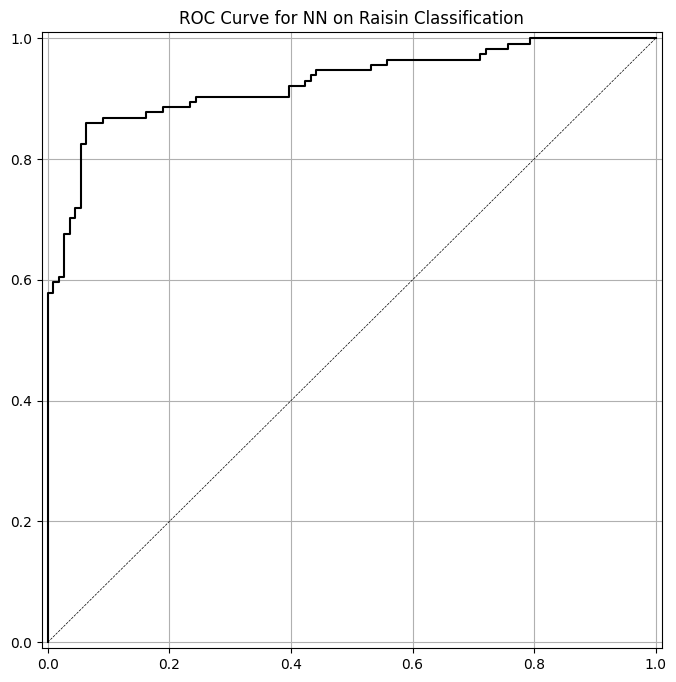

In [141]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred_prob, 'NN')

In [142]:
accuracies = accuracy_score(y_test,y_pred_class)
accuracies

0.8888888888888888

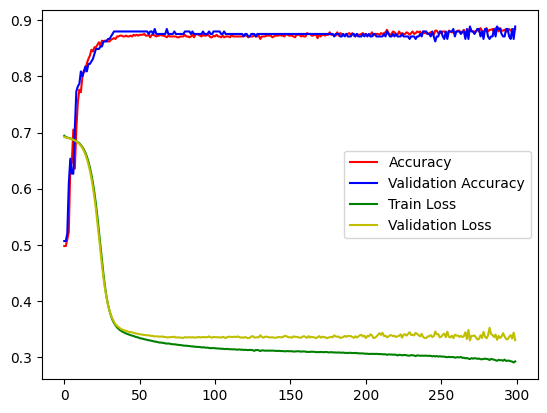

In [143]:
fig, ax = plt.subplots()
ax.plot(model_fit.history["accuracy"],'r', label="Accuracy")
ax.plot(model_fit.history["val_accuracy"],'b',
        label="Validation Accuracy")
ax.plot(model_fit.history["loss"],'g', label="Train Loss")
ax.plot(model_fit.history["val_loss"],'y', label="Validation Loss")
ax.legend()

**Analysis:** Based on the graph above, the model gives an promising perfromance when it comes to processing and training the data. The model created have multiple hidden layers with various parameters which will process the data. Also the number of epochs and learning rate was changed to observe changes and how to enhnace the model performance. The graph of the accuracy and validation accuracy has its rough visualization just like the previous graphs which shows inconsistency in terms of generating the accuracy rate of the model in processing the data. The rough visulization of the graph were shown in the start of the epochs which make make a poor accuracy in the side of the model' performance. However the curve of the train and validation loss has its smooth curve in its first 130 epochs but starting to have rough (spikes) visualization as it progress. This would shows the perfromance of the model in processing and predicting the data poor or not that good. The accuracy and roc-auc score of the model reached for approximately about 90% which shows an average performace regarding training data and predicting its values. From all the data that were processed, the model only reached for about 87.6% in terms of accuracy as well as 91.6% when it comes to roc-auc score.

# **Conclusion**

In this activity, we were introduced on how to process and train data using neural netwroks. This activity allow us to create our own model, assign our needed parameters, optimizers, and learning rate which we think can be good factors to enhance the performance of the mode. There are various enhancements of model in order to achieve good results. However, the model only give a an approximate result of 80% to 90% given with the parameters given. This performance of the model may be because of the dataset or the poorly creating the model. Enhancement of the model is the highlight of this activity as well as showing how models work through structuring the layers and adding some optimizer that will work with the data which will collectively process and predict data. Overall, this activity let us learn the and further understand how neura;l network works in terms of processing, training and predicting the values.

Colab Link : https://colab.research.google.com/drive/1Xy9qJsvffhZqjLMqzMEqxzjGBgcnAupp?usp=sharing